In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import os
import pdb
from astropy.table import QTable, Table
import astropy.units as u
import astropy.constants as const
from astropy.io import ascii
import math
import shutil
plt.rc('text',usetex=True)
plt.rc('font', family='Computer Modern')

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plot_dpi = 300

"""
TO DO:
-----
- create plots for eqorbmesc

"""

'\nTO DO:\n-----\n- create plots for eqorbmesc\n\n'

''

/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


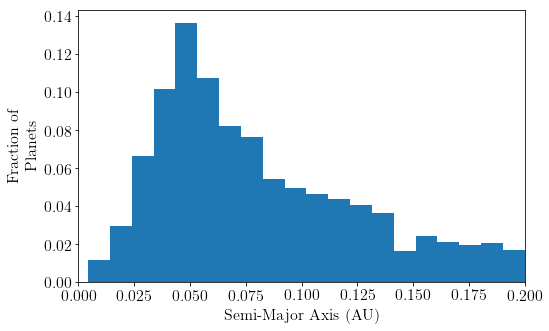

In [36]:
data = QTable.read('semi_lt_p2au.csv', format='ascii')
data = data['pl_orbsmax']
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)

ax.hist(data, bins=20, weights=np.zeros_like(data)+1./data.size)
ax.set_xlim(0,0.2)
ax.set_ylabel('Fraction of\nPlanets', fontsize=16)
ax.set_xlabel('Semi-Major Axis (AU)', fontsize=16)
fig.savefig('./figs/3daypileup.pdf', bbox_inches='tight', dpi=plot_dpi)
;

In [37]:
eqonly_dir = './final_data/runs_eq_only/'
eqorb_dir = './final_data/runs_eqorb/'
eqorbmesc_dir = './final_data/runs_eqorbmesc/'
eqmesc_dir='./final_data/runs_eqmesc/'
eqstell_dir = './final_data/runs_eqstell'

# lets make a ecc distribution
probecc_data = QTable.read('probecc_comma.dat',format='ascii.no_header', names=['ecc','%inbin','cum%'])
planet_data = QTable.read('planets.csv',format='ascii')
rad_data = planet_data['pl_radj'] * (const.R_jup/const.R_earth)



def get_IC_data(n):
    '''
    n = sim number
    '''
    foldername = "%05i"%n
    folderdir = eqorb_dir + foldername
    b_file = open(folderdir + '/b.in','r')
    c_file = open(folderdir + '/c.in','r')
    star_file =open(folderdir + '/star.in','r')
    vpl_file = open(folderdir + '/vpl.in','r')
    b_content = b_file.read()
    c_content = c_file.read()
    star_content = star_file.read()
    vpl_content = vpl_file.read()
    b_content = b_content.split('\n')
    c_content = c_content.split('\n')
    star_content = star_content.split('\n')
    vpl_content = vpl_content.split('\n')
    
    b_ecc_line = 9
    c_ecc_line = 9
    b_rad_line = 5
    c_rad_line = 5
    b_semi_line = 10
    c_semi_line = 10
    b_mass_line = 4
    c_mass_line = 4
    
    b_ecc = b_content[b_ecc_line]
    c_ecc = c_content[c_ecc_line]
    b_ecc = float(b_ecc.split('\t\t')[1])
    c_ecc = float(c_ecc.split('\t\t')[1])
    
    b_rad = b_content[b_rad_line]
    c_rad = c_content[c_rad_line]
    b_rad = float(b_rad.split('\t\t')[1])*-1
    c_rad = float(c_rad.split('\t\t')[1])*-1
    
    b_semi = b_content[b_semi_line]
    c_semi = c_content[c_semi_line]
    b_semi = float(b_semi.split('\t\t')[1])
    c_semi = float(c_semi.split('\t\t')[1])
    
    b_mass = b_content[b_mass_line]
    c_mass = c_content[c_mass_line]
    b_mass = float(b_mass.split('\t\t')[1])*-1
    c_mass = float(c_mass.split('\t\t')[1])*-1
    
    print(foldername,end='\r')
    return b_ecc, c_ecc, b_rad, c_rad, b_semi, c_semi, b_mass, c_mass
    
i = 0
n = 25000
b_ecc_list = np.zeros(shape=(n))
c_ecc_list = np.zeros(shape=(n))
b_rad_list = np.zeros(shape=(n))
c_rad_list = np.zeros(shape=(n))
b_semi_list = np.zeros(shape=(n))
c_semi_list = np.zeros(shape=(n))
b_mass_list = np.zeros(shape=(n))
c_mass_list = np.zeros(shape=(n))

while i <= n-1:
    (b_ecc_list[i], c_ecc_list[i], b_rad_list[i], c_rad_list[i], b_semi_list[i], c_semi_list[i],
     b_mass_list[i], c_mass_list[i]) = get_IC_data(i)
    i += 1

    
# now we have the data
# so lets make it into a histogram and save that shit



''

/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


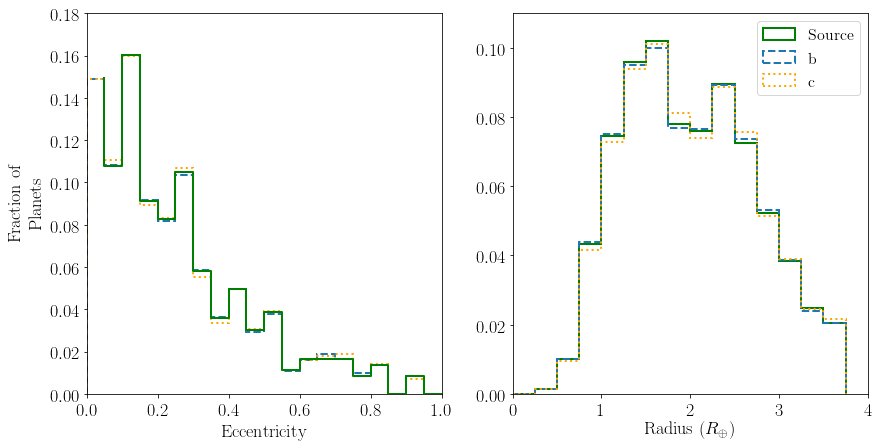

In [38]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(14,7)

fontsize = 18

x = np.arange(0,1,0.05)
y = probecc_data['cum%']
ecc_in_bin = probecc_data['%inbin']
z = probecc_data['ecc']
#z = z.insert(0,0)
#y = y.insert(0,y[0])
x_rad = np.arange(0,4,0.25)


#pdb.set_trace()
ax[0].set_xlabel('Eccentricity',fontsize=fontsize)
ax[0].set_ylabel('Fraction of\nPlanets', fontsize=fontsize)
ax[0].step(z+0.05,ecc_in_bin, color='green',where='pre', lw=2, label='Source')
ax[0].set(ylim=(0,0.18), xlim=(0,1))
ax[0].hist(b_ecc_list,bins=x,weights=np.zeros_like(b_ecc_list)+1./b_ecc_list.size,histtype='step', label='b', ls='--', lw=2)
ax[0].hist(c_ecc_list,bins=x,weights=np.zeros_like(c_ecc_list)+1./c_ecc_list.size,histtype='step',color='orange', label='c', ls=':', lw=2)
ax[0].tick_params(labelsize=fontsize)

ax[1].set_xlabel('Radius ($R_{\oplus}$)', fontsize=fontsize)
rad_dist = ax[1].hist(rad_data,bins=x_rad,weights=np.zeros_like(rad_data)+1./rad_data.size,histtype='step', color='green', label='Source', lw=2)
y_rad = rad_dist[0].cumsum()
rad_b_hist = ax[1].hist(b_rad_list,bins=x_rad,weights=np.zeros_like(b_rad_list)+1./b_rad_list.size,histtype='step', label = 'b', ls='--', lw=2)
rad_c_hist = ax[1].hist(c_rad_list,bins=x_rad,weights=np.zeros_like(c_rad_list)+1./c_rad_list.size,histtype='step',color='orange', label='c',ls=':', lw=2)
ax[1].legend(loc=0, fontsize=fontsize-2)
ax[1].set(xlim=(0,4),ylim=(0,0.11))
ax[1].tick_params(labelsize=fontsize)
fig.savefig('./figs/ecc_rad_dist.pdf',bbox_inches='tight', dpi=plot_dpi)
;

/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


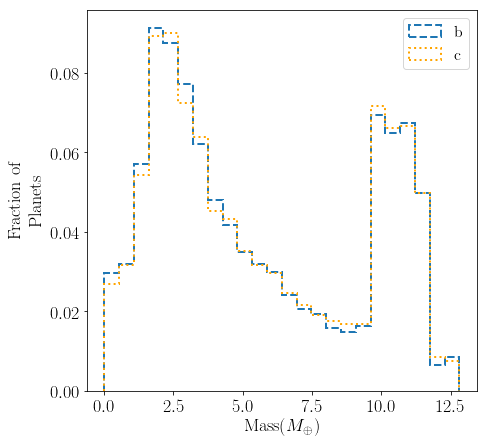

In [39]:
# now lets plot mass
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

fontsize=18
bins=24

ax.hist(b_mass_list, bins=bins, weights=np.zeros_like(b_mass_list)+1./b_mass_list.size, histtype='step', label='b',ls='--', lw=2)
ax.hist(c_mass_list, bins=bins, weights=np.zeros_like(c_mass_list)+1./c_mass_list.size, color='orange', histtype='step',label='c', ls=':', lw=2);
ax.legend(loc=0, fontsize=fontsize-2)
ax.set_xlabel("Mass($M_{\oplus}$)", fontsize=fontsize)
ax.set_ylabel("Fraction of\nPlanets",fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
fig.savefig('./figs/mass_dist.pdf',bbox_inches='tight', dpi=plot_dpi)

In [86]:
def check_merge(log_dir):
    try:
        log_file = open(log_dir+"/log","r")
        log_content = log_file.read()
        #pdb.set_trace()
        find_merge = log_content.find("HALT: Merge")            
        find_lum_grid_halt = log_content.find("HALT: star reached the edge of the luminosity grid")
        if find_merge != -1:
            bMerge = 1
        elif find_lum_grid_halt != -1:
            bMerge = -1
        else:
            bMerge = 0
    
        return bMerge
    except FileNotFoundError:
        bMerge = -9999
        return bMerge
    except IndexError:
        bMerge = -9999
        return bMerge

    
def calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c):
    # mass in units of earthmasses
    # semi in units of AU
    #mass_star = (mass_star *u.solMass).to(u.earthMass).value # solmass to earth mass
    mass_star = mass_star * u.M_sun
    G = const.G
    mass_b = mass_b * u.M_earth
    mass_c = mass_c * u.M_earth
    semi_b = semi_b * u.AU
    semi_c = semi_c * u.AU
    
    #G = (const.G.to(u.AU**3 / (u.earthMass*u.s**2))).value # to units fo AU^3/earthmass s^2
    n_b = np.sqrt(G*(mass_star + mass_b)/(semi_b**3))
    alpha = semi_c / semi_b
    strength = (mass_c/semi_b)* alpha**2 * ecc_b * ecc_c * (np.sqrt(1-ecc_b**2)/(n_b*semi_b**2*ecc_b))
    return strength.decompose()


def calc_char_strength():
    char_dir = './final_data/char/eqorb'

    sim_dir = char_dir

    star_file = sim_dir + '/star.in'
    star_file = open(star_file,'r')
    star_content = star_file.readlines()
    mass_star = np.float64(star_content[3].split('\t\t')[1][:-1]) # solar mass

    c_file = sim_dir + '/c.in'
    c_file = open(c_file,'r')
    c_content = c_file.readlines()
    mass_c = np.float64(c_content[4].split('\t\t')[1][:-1])*-1
    rad_c = np.float64(c_content[5].split('\t\t')[1][:-1])*-1
    semi_c = np.float64(c_content[10].split('\t\t')[1][:-1])
    ecc_c = np.float64(c_content[9].split('\t\t')[1][:-1])

    b_file = sim_dir + '/b.in'
    b_file = open(b_file,'r')
    b_content = b_file.readlines()
    mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
    rad_b = np.float64(b_content[5].split('\t\t')[1][:-1])*-1
    semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
    ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])

    char_strength = calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c)
    return char_strength


char_strength = calc_char_strength()


def get_merged_data(runs_dir,bAddModule=0):
    '''
    this function is gonna get all the merged data
    '''
    runs_list = np.array([]) # we are going to store the run names in this array
    bad_sim_list = np.array([])
    bMerge_list = np.array([]) # store the sims that merged
    bad_ecc_list = np.array([])
    modules = "Eqtide"
    bStellar = 0
    bAtmesc = 0
    bDistorb = 0
    
    
    print('Finding Sims...',end='\r')
    for dir_name in os.walk(runs_dir):
        if dir_name[0] != runs_dir: # the first one in os.walk is the source dir eg runs_dir
            runs_list = np.append(runs_list, dir_name[0])
            #print('Found %i Sims'%(len(runs_list)), end='\r')
    n_sims = len(runs_list)
    print("Found %i Sims\n"%n_sims)

    mass_b_list = np.array([])
    tidalq_b_list = np.array([])
    semi_b_list = np.array([])
    ecc_b_list = np.array([])
    bMerge_eqtide_list = np.array([])
    
    
    # lets see what modules are being used (eqtide by default)
    if runs_dir.find('orb') != -1: # are we using distorb? (yes)
        bDistorb = 1
        modules = modules + "+Distorb"
        # initialize other variables to track
        mass_c_list = np.array([])
        tidalq_c_list = np.array([])
        semi_c_list = np.array([])
        ecc_c_list = np.array([])
        strength_list = np.array([])
        bMerge_eqorb_list = np.array([])
        
        if runs_dir.find('mesc') != -1: # are we using atmesc? (yes)
            bAtmesc = 1
            modules = modules + "+Atmesc"
            Lum_grid_counter = 0 
            bMerge_eqorbmesc_list = np.array([])
            bMerge_eqmesc_list = np.array([])
            b_atm_lost_sims = np.array([])
            c_atm_lost_sims = np.array([])
        else: #we are not using atmesc
            bAtmesc = 0
    elif runs_dir.find('mesc') != -1: #eqtide+atmesc
        bDistorb = 0
        bAtmesc = 1
        modules = modules + "+Atmesc"
        Lum_grid_counter = 0
        bMerge_eqmesc_list = np.array([])
        b_atm_lost_sims = np.array([])
    
    elif runs_dir.find('stell') != -1:
        bDistorb = 0
        bAtmesc = 0
        bStellar = 1
        modules = modules + "+Stellar"
        bMerge_eqstell_list = np.array([])
        
    else: #eqtide only
        bDistorb = 0
        bAtmesc = 0
        
    print("Fetching data for %s runs..."%modules)
    
    # now lets iterate over them and read in the final data
    i = 0
    for idx,sim_dir in enumerate(runs_list):
        print ("%0.1f %%"%(i/n_sims*100), end='\r')
        i += 1
        # lets check if distorb is used, to read in c ICs as well:
        #pdb.set_trace()
        sim_idx = int(sim_dir.split(runs_dir)[1][1:])
        if bDistorb: # eqtide+distorb
            star_file = sim_dir + '/star.in'
            star_file = open(star_file,'r')
            star_content = star_file.readlines()
            mass_star = np.float64(star_content[3].split('\t\t')[1][:-1]) # solar mass

            c_file = sim_dir + '/c.in'
            c_file = open(c_file,'r')
            c_content = c_file.readlines()
            mass_c = np.float64(c_content[4].split('\t\t')[1][:-1])*-1
            mass_c_list = np.append(mass_c_list, mass_c)
            rad_c = np.float64(c_content[5].split('\t\t')[1][:-1])*-1
            semi_c = np.float64(c_content[10].split('\t\t')[1][:-1])
            semi_c_list = np.append(semi_c_list, semi_c)
            ecc_c = np.float64(c_content[9].split('\t\t')[1][:-1])
            ecc_c_list = np.append(ecc_c_list, ecc_c)

            b_file = sim_dir + '/b.in'
            b_file = open(b_file,'r')
            b_content = b_file.readlines()
            mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
            mass_b_list = np.append(mass_b_list, mass_b)
            rad_b = np.float64(b_content[5].split('\t\t')[1][:-1])*-1
            semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
            semi_b_list = np.append(semi_b_list, semi_b)
            ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
            ecc_b_list = np.append(ecc_b_list, ecc_b)

            strength = calc_strength(mass_star, mass_b, mass_c, semi_b, semi_c, ecc_b, ecc_c)
            strength = strength / char_strength
            strength_list = np.append(strength_list,strength)

            b_fwd = open(sim_dir+"/system.b.forward",'r')
            b_fwd_content = b_fwd.readlines()
            last_line = b_fwd_content[-1]
            last_line = last_line.split(' ')
            ecc = last_line[2]
            ecc = np.float64(ecc)
            if ecc == 0:
                bad_ecc_list = np.append(bad_ecc_list, sim_idx)

            if bAtmesc: #eqtide+distorb+atmesc
                log_file = sim_dir + "/log"
                log_file = open(log_file,'r')
                log_content = log_file.read()

                if rad_b > 2: # there is an atmosphere, lets see if it was lost
                    b_fwd = open(sim_dir+"/system.b.forward",'r')
                    b_fwd_content = b_fwd.readlines()
                    tidalqenv_b = b_fwd_content[0].split(' ')[-3]

                    # test for lost atmospheres (b)
                    for line in b_fwd_content:
                        tidalq_output = line.split(' ')[-3]
                        envmass = np.float64(line.split(' ')[-4])
                        if (envmass == 0):
                            b_atm_lost_sims = np.append(b_atm_lost_sims, sim_idx)
                            break

                if rad_c > 2: # there is an atmosphere, lets see if it was lost
                    c_fwd = open(sim_dir+"/system.c.forward",'r')
                    c_fwd_content = c_fwd.readlines()
                    tidalqenv_c = c_fwd_content[0].split(' ')[-3]

                    # test for lost atmospheres (c)
                    for line in c_fwd_content:
                        tidalq_output = line.split(' ')[-3]
                        envmass = np.float64(line.split(' ')[-4])
                        if (envmass == 0):
                            c_atm_lost_sims = np.append(c_atm_lost_sims, sim_idx)
                            break

                # test for eqorbmesc merge
                bMerge_eqorbmesc = check_merge(sim_dir)
                bMerge_eqorbmesc_list = np.append(bMerge_eqorbmesc_list, bMerge_eqorbmesc)

                #test for eqmesc merge
                eqmesc_sim_dir = sim_dir.split('runs_eqorbmesc')
                eqmesc_sim_dir = eqmesc_sim_dir[0] + 'runs_eqmesc' + eqmesc_sim_dir[1]
                bMerge_eqmesc = check_merge(eqmesc_sim_dir)
                bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge_eqmesc)

                # test for eqtide merge
                eq_sim_dir = sim_dir.split('runs_eqorbmesc')
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)

                # test for eqorb merge
                eqorb_sim_dir = sim_dir.split('runs_eqorbmesc')
                eqorb_sim_dir = eqorb_sim_dir[0] + "runs_eqorb" + eqorb_sim_dir[1]
                bMerge_eqorb = check_merge(eqorb_sim_dir)
                bMerge_eqorb_list = np.append(bMerge_eqorb_list,bMerge_eqorb)
                
                #test for eqstell merge
                eqstell_sim_dir = sim_dir.split('runs_eqorbmesc')
                eqstell_sim_dir = eqstell_sim_dir[0] + "runs_eqstell" + eqstell_sim_dir[1]
                bMerge_eqstell = check_merge(eqstell_sim_dir)
                bMerge_eqstell_list = np.append(bMerge_eqstell_list,bMerge_eqstell)
                

            else: #eqtide+distorb, testing merges   
                # test for distorb merge
                bMerge_eqorb = check_merge(sim_dir)
                bMerge_eqorb_list = np.append(bMerge_eqorb_list,bMerge_eqorb)
                
                # test for eqtide merge
                eq_sim_dir = sim_dir.split('runs_eqorb')
                eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
                bMerge_eqonly = check_merge(eq_sim_dir)
                bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)
                
                #test for eqstell merge
                eqstell_sim_dir = sim_dir.split('runs_eqorb')
                eqstell_sim_dir = eqstell_sim_dir[0] + "runs_eqstell" + eqstell_sim_dir[1]
                bMerge_eqstell = check_merge(eqstell_sim_dir)
                bMerge_eqstell_list = np.append(bMerge_eqstell_list,bMerge_eqstell)


        elif bAtmesc: #eqtide+atmesc
            #if sim_idx == 10937:
            #    pdb.set_trace()
            log_file = sim_dir + "/log"
            log_file = open(log_file,'r')
            log_content = log_file.read()
            if log_content.find("HALT: star reached the edge of the luminosity grid") != -1:
                Lum_grid_counter += 1
            b_file = sim_dir + '/b.in'
            b_file = open(b_file,'r')
            b_content = b_file.readlines()
            mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
            mass_b_list = np.append(mass_b_list, mass_b)
            semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
            semi_b_list = np.append(semi_b_list, semi_b)
            ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
            ecc_b_list = np.append(ecc_b_list, ecc_b)

            b_fwd = open(sim_dir+"/system.b.forward",'r')
            b_fwd_content = b_fwd.readlines()
            tidalqenv_b = b_fwd_content[0].split(' ')[-3]
            for line in b_fwd_content:
                #pdb.set_trace()
                tidalq_output = line.split(' ')[-3]
                envmass = np.float64(line.split(' ')[-4])
                if (envmass == 0):
                    b_atm_lost_sims = np.append(b_atm_lost_sims, sim_idx)
                    break
            last_line = b_fwd_content[-1]
            last_line = last_line.split(' ')
            ecc = last_line[2]
            ecc = np.float64(ecc)
            if ecc == 0:
                bad_ecc_list = np.append(bad_ecc_list, sim_idx)

            # test for merge
            bMerge_eqmesc = check_merge(sim_dir)
            bMerge_eqmesc_list = np.append(bMerge_eqmesc_list, bMerge_eqmesc)
            
            # check for eqtide merge
            eq_sim_dir = sim_dir.split("runs_eqmesc")
            eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
            bMerge_eqonly = check_merge(eq_sim_dir)
            bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)

            #test for eqstell merge
            eqstell_sim_dir = sim_dir.split('runs_eqorb')
            eqstell_sim_dir = eqstell_sim_dir[0] + "runs_eqstell" + eqstell_sim_dir[1]
            bMerge_eqstell = check_merge(eqstell_sim_dir)
            bMerge_eqstell_list = np.append(bMerge_eqstell_list,bMerge_eqstell)

        elif bStellar: #eqtide + stellar
            b_file = sim_dir + '/b.in'
            b_file = open(b_file,'r')
            b_content = b_file.readlines()
            mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
            mass_b_list = np.append(mass_b_list, mass_b)
            semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
            semi_b_list = np.append(semi_b_list, semi_b)
            ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
            ecc_b_list = np.append(ecc_b_list, ecc_b)

            b_fwd = open(sim_dir+"/system.b.forward",'r')
            b_fwd_content = b_fwd.readlines()
            last_line = b_fwd_content[-1]
            last_line = last_line.split(' ')
            ecc = last_line[2]
            ecc = np.float64(ecc)
            if ecc == 0:
                bad_ecc_list = np.append(bad_ecc_list, sim_idx)

            # test for eqstell merge
            bMerge = check_merge(sim_dir)
            bMerge_eqstell_list = np.append(bMerge_eqstell_list, bMerge)
            
            # test for eqtide Merge
            eq_sim_dir = sim_dir.split("runs_eqstell")
            eq_sim_dir = eq_sim_dir[0] + "runs_eq_only" + eq_sim_dir[1]
            bMerge_eqonly = check_merge(eq_sim_dir)
            bMerge_eqtide_list = np.append(bMerge_eqtide_list, bMerge_eqonly)
            
        
        else: #eqtide
            b_file = sim_dir + '/b.in'
            b_file = open(b_file,'r')
            b_content = b_file.readlines()
            mass_b = np.float64(b_content[4].split('\t\t')[1][:-1])*-1
            mass_b_list = np.append(mass_b_list, mass_b)
            semi_b = np.float64(b_content[10].split('\t\t')[1][:-1])
            semi_b_list = np.append(semi_b_list, semi_b)
            ecc_b = np.float64(b_content[9].split('\t\t')[1][:-1])
            ecc_b_list = np.append(ecc_b_list, ecc_b)

            b_fwd = open(sim_dir+"/system.b.forward",'r')
            b_fwd_content = b_fwd.readlines()
            last_line = b_fwd_content[-1]
            last_line = last_line.split(' ')
            ecc = last_line[2]
            ecc = np.float64(ecc)
            if ecc == 0:
                bad_ecc_list = np.append(bad_ecc_list, sim_idx)

            # test for merge
            bMerge = check_merge(sim_dir)
            bMerge_list = np.append(bMerge_list, bMerge)

    # now to control for what to return based on module
    print("%i Sims produced errors when reading:\n "%bad_sim_list.shape)
    #print(bad_sim_list)
    #pdb.set_trace()
    if (bDistorb == 1 and bAtmesc == 0): #eqtide + distorb
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        output_titles = ['Dirs','mass_b_0', 'mass_c_0', 'semi_b_0', 'semi_c_0',
                         'ecc_b_0', 'ecc_c_0','strength', 'bMerge_eqtide', 'bMerge_eqorb']
        output_dtypes = ('str','float64', 'float64', 'float64', 'float64', 'float64', 
                         'float64', 'float64', 'float64', 'float64')
        output_list = np.array([runs_list, mass_b_list, mass_c_list, semi_b_list,
                                semi_c_list, ecc_b_list, ecc_c_list, strength_list,
                                bMerge_eqtide_list, bMerge_eqorb_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names=output_titles, dtype=output_dtypes)
        
    elif (bDistorb == 0 and bAtmesc == 1): #eqtide + atmesc
        print("%i Sims out of %i lost their envelopes (b)\n"%(len(b_atm_lost_sims), len(runs_list)))
        print("%i Sims had stars reach end of lum. grid\n"%Lum_grid_counter)
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        
        output_titles = ['Dirs', 'mass_b_0', 'semi_b_0', 'ecc_b_0', 'bMerge_eqtide', 'bMerge_eqmesc']
        output_dtypes = ('str', 'float64','float64','float64','float64', 'float64')
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_eqtide_list, bMerge_eqmesc_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names=output_titles, dtype=output_dtypes)
        
    elif (bDistorb == 1 and bAtmesc == 1): #eqtide + distorb + atmesc
        print("%i Sims out of %i lost their envelopes (b)\n"%(len(b_atm_lost_sims), len(runs_list)))
        print("%i Sims out of %i lost their envelopes (c)\n"%(len(c_atm_lost_sims), len(runs_list)))
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        output_titles = ['Dirs', 'mass_b_0', 'mass_c_0', 'semi_b_0', 'semi_c_0',
                        'ecc_b_0', 'ecc_c_0', 'strength','bMerge_eqtide', 'bMerge_eqmesc','bMerge_eqorb',
                        'bMerge_eqorbmesc']
        output_dtypes = ('str', 'float64', 'float64', 'float64', 'float64',
                         'float64', 'float64', 'float64', 'float64', 'float64',
                         'float64','float64')
        output_list = np.array([runs_list, mass_b_list, mass_c_list, semi_b_list,
                                semi_c_list, ecc_b_list, ecc_c_list, strength_list,
                                bMerge_eqtide_list, bMerge_eqmesc_list, bMerge_eqorb_list, bMerge_eqorbmesc_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names = output_titles, dtype=output_dtypes)
        
    elif (bStellar == 1): #eqtide + stellar
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        output_titles = ['Dirs', 'mass_b_0', 'semi_b_0', 'ecc_b_0', 'bMerge_eqtide', 'bMerge_eqstell']
        output_dtypes = ('str', 'float64','float64','float64','float64', 'float64')
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_eqtide_list, bMerge_eqstell_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names=output_titles, dtype=output_dtypes) 
        
        
    else: # eqtide
        print("%i Sims had ecc == 0 by the end of the simulation."%(len(bad_ecc_list)))
        output_titles = ['Dirs', 'mass_b_0', 'semi_b_0', 'ecc_b_0', 'bMerge_eqtide']
        output_dtypes = ('str', 'float64', 'float64', 'float64', 'float64')
        output_list = np.array([runs_list, mass_b_list, semi_b_list, ecc_b_list,
                                bMerge_list])
        output_list = output_list.transpose()
        output_table = Table(output_list, names=output_titles, dtype=output_dtypes)
        
        
    return output_table
    

    
def make_contour(x_data, y_data, z_data, names='default', labels = ['Semi-Major Axis (AU)', 'Mass($M_\oplus$)', 'Ecc'], 
                 x_binwidth=0.01, y_binwidth=0.5, xlim=(0,0.04), ylim=(0,12),levels=[0.1,0.2,0.3,0.4,0.5,0.6],log=False,
                 fontsize=18):
    '''
    here, the final_data input is (~25000,3) dataset, where each row repesents one simulation ()
    [:,0] = mass, [:,1] = semi, [:,3] = ecc
    '''
    name = labels[0]+'_vs_' + labels[1]+names
    
    if log == True:
        x_axis = np.logspace(4,16,24)
        y_axis = np.arange(np.min(y_data),math.ceil(np.max(y_data)), y_binwidth)
        #pdb.set_trace()
    else:
        x_axis = np.arange(xlim[0],xlim[1]+x_binwidth,x_binwidth)
        y_axis = np.arange(ylim[0],ylim[1]+y_binwidth,y_binwidth)
    z_axis = np.zeros(shape=(len(y_axis)-1,len(x_axis)-1))
    z_meta_axis = np.zeros(shape=(len(y_axis)-1, len(x_axis)-1))
    
    print("Shaping Contour Data...")
    for y_idx, y in enumerate(y_axis[:-1]):
        y_lower_bin = y
        y_upper_bin = y_axis[y_idx+1]
        
        for x_idx, x in enumerate(x_axis[:-1]):
            x_lower_bin = x
            x_upper_bin = x_axis[x_idx+1]
            x_bin = np.array([])


            for x_i, y_i, z_i in zip(x_data, y_data, z_data):
                if (y_i<y_upper_bin and y_i > y_lower_bin and x_i < x_upper_bin and x_i > x_lower_bin):
                    x_bin = np.append(x_bin, z_i)
                    
            avg_z_in_x_bin = np.mean(x_bin)
            z_axis[y_idx][x_idx] = avg_z_in_x_bin
            z_meta_axis[y_idx][x_idx] = len(x_bin)
            #y_avg_xs = np.append(y_avg_xs, avg_z_in_x_bin)
            
    print("Making Eccentricty Plot")
    fig,ax = plt.subplots(1,1)
    fig.set_size_inches(10,10)
    if log == True:
        ax.set_xscale('log')
    matplotlib.rcParams.update({'font.size': fontsize-4})
    ct = ax.contour(z_axis,levels=levels, extent=(x_axis[0],x_axis[-1],y_axis[0],y_axis[-1]), colors='k')
    #ct = ax.imshow(z_axis, extent = (x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]),
    #               interpolation = 'nearest', origin='lower', cmap='cubehelix')
    ax.set_xlabel(labels[0],fontsize=fontsize)
    ax.set_ylabel(labels[1],fontsize=fontsize)
    ax.set_xlim(xlim)
    ax.tick_params(labelsize=fontsize)
    #ax.clabel(ct,inline=True)
    fig.savefig('./figs/'+names+'.pdf',bbox_inches='tight', dpi=plot_dpi)
    return x_axis, y_axis, z_axis, z_meta_axis


def make_contour_meta_plots(z_axis, z_meta_axis, name, cmap = 'cubehelix', log10_counts=False):
    if log10_counts==True:
        z_meta_axis = np.log10(z_meta_axis)
        counts_title = ' log10(Counts per bin)'
    else:
        counts_title = ' Counts per bin'
    
    fig,ax = plt.subplots(1,2)
    fig.set_size_inches(10,5)

    matplotlib.rcParams.update({'font.size': fontsize-4})
    image1 = ax[0].imshow(z_axis, origin='lower', interpolation='nearest',cmap=cmap)
    cb1axes = fig.add_axes([0.42, 0.15, 0.03, 0.7])
    cbar1 = fig.colorbar(image1, cax=cb1axes, ticks=[0.0,0.2,0.4,0.6,0.8,1])
    ax[0].set_title(name + ' Avg Ecc per bin', fontsize=fontsize)
    ax[0].set_xlabel('Bin X Index',fontsize=fontsize-3)
    ax[0].set_ylabel('Bin Y Index',fontsize=fontsize-3)
    ax[0].set_xticks(np.arange(0,len(z_axis[0]), 1))

    image2 = ax[1].imshow(z_meta_axis, origin='lower', interpolation='nearest', cmap=cmap)
    cb2axes = fig.add_axes([0.84, 0.15, 0.03, 0.7])
    cbar2 = fig.colorbar(image2, cax=cb2axes)
    ax[1].set_title(name + counts_title, fontsize=fontsize)
    ax[1].set_xlabel('Bin X Index',fontsize=fontsize-3)
    ax[1].set_xticks(np.arange(0,len(z_axis[0]), 1))
    fig.savefig('./figs/'+'meta_contour_'+name+'.pdf',bbox_inches='tight', dpi=plot_dpi)
        
        


In [41]:
final_data_eqstell = Table.read('./final_data/eqstell.dat', format='ascii.csv')
#final_data_eqstell = get_merged_data(eqstell_dir)
#final_data_eqstell.write('./final_data/eqstell.dat', format='ascii.csv', overwrite=True)
final_data_eqstell

Dirs,mass_b_0,semi_b_0,ecc_b_0,bMerge_eqtide,bMerge_eqstell
str31,float64,float64,float64,float64,float64
./final_data/runs_eqstell/06813,5.97309848243,0.0594507264484,0.109284105617,0.0,-1.0
./final_data/runs_eqstell/04446,5.97455833311,0.100279786774,0.715529787,0.0,-1.0
./final_data/runs_eqstell/19359,10.4064023573,0.0467747888381,0.555039303587,0.0,1.0
./final_data/runs_eqstell/02564,1.59529854357,0.038560148021,0.292346088345,0.0,-1.0
./final_data/runs_eqstell/03792,10.731559066,0.0285961309943,0.159751318725,0.0,-1.0
./final_data/runs_eqstell/05163,10.8927584806,0.0616394324184,0.264034445198,0.0,-1.0
./final_data/runs_eqstell/11278,0.181983162509,0.117632795476,0.411368121792,0.0,-1.0
./final_data/runs_eqstell/14260,4.09787103396,0.0877567456055,0.0201676942628,0.0,-1.0
./final_data/runs_eqstell/22210,1.67217473411,0.0494505231984,0.359471647852,0.0,-1.0


In [43]:
final_data_eqorbmesc = Table.read('./final_data/eqorbmesc.dat', format='ascii.csv')
#final_data_eqorbmesc = get_merged_data(eqorbmesc_dir) # generates final data
#final_data_eqorbmesc.write('./final_data/eqorbmesc.dat', format='ascii.csv', overwrite=True) # saves final data
final_data_eqorbmesc # shows final data


Dirs,mass_b_0,mass_c_0,semi_b_0,semi_c_0,ecc_b_0,ecc_c_0,strength,bMerge_eqtide,bMerge_eqmesc,bMerge_eqorb,bMerge_eqorbmesc
str33,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
./final_data/runs_eqorbmesc/04533,11.0919997417,1.89771588674,0.100904847456,0.250904847456,0.0955101796221,0.381799549831,1.3802881601596177,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/03110,10.2124915183,5.91326289192,0.0237191743493,0.0637191743493,0.31208738761,0.0239622189827,2.142084925795359,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/14872,3.30634824596,10.6404670343,0.137520201683,0.477520201683,0.210767104608,0.425756361561,8.025317686546398,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/05756,1.50837324588,1.27180873544,0.0348258500388,0.164825850039,0.836362889547,0.122481643501,2.521863087378783,0.0,1.0,0.0,1.0
./final_data/runs_eqorbmesc/04073,9.32519322013,6.90037958477,0.0736000298617,0.173600029862,0.0290426616488,0.272957404283,5.514218784762265,0.0,-9999.0,0.0,0.0
./final_data/runs_eqorbmesc/12926,11.642355063,6.9122203085,0.108043398821,0.308043398821,0.247166960535,0.411333650708,4.795859316073331,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/20622,11.4865099023,2.04783458757,0.0398546916383,0.129854691638,0.188655372721,0.466657348491,11.407009416849148,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/08069,9.37352594624,3.36104738135,0.145636664137,0.645636664137,0.0452386358611,0.685260834398,8.111473484393057,0.0,0.0,0.0,0.0
./final_data/runs_eqorbmesc/24372,2.73604533581,3.03394199352,0.014824136035,0.034824136035,0.128813909987,0.0782811360806,5.73828162869075,1.0,0.0,1.0,1.0


In [44]:
final_data_eqmesc = Table.read('./final_data/eqmesc.dat', format='ascii.csv')
#final_data_eqmesc = get_merged_data(eqmesc_dir)
#final_data_eqmesc.write('./final_data/eqmesc.dat', format='ascii.csv', overwrite=True)
final_data_eqmesc

Dirs,mass_b_0,semi_b_0,ecc_b_0,bMerge_eqtide,bMerge_eqmesc
str30,float64,float64,float64,float64,float64
./final_data/runs_eqmesc/04533,11.0919997417,0.100904847456,0.0955101796221,0.0,0.0
./final_data/runs_eqmesc/03110,10.2124915183,0.0237191743493,0.31208738761,0.0,0.0
./final_data/runs_eqmesc/14872,3.30634824596,0.137520201683,0.210767104608,0.0,0.0
./final_data/runs_eqmesc/05756,1.50837324588,0.0348258500388,0.836362889547,0.0,1.0
./final_data/runs_eqmesc/12926,11.642355063,0.108043398821,0.247166960535,0.0,0.0
./final_data/runs_eqmesc/20622,11.4865099023,0.0398546916383,0.188655372721,0.0,0.0
./final_data/runs_eqmesc/08069,9.37352594624,0.145636664137,0.0452386358611,0.0,0.0
./final_data/runs_eqmesc/24372,2.73604533581,0.014824136035,0.128813909987,1.0,0.0
./final_data/runs_eqmesc/03039,1.50845945752,0.0304082692954,0.186358472386,0.0,0.0


In [45]:
final_data_eqonly = Table.read('./final_data/eqonly.dat', format='ascii.csv')
#final_data_eqonly = get_merged_data(eqonly_dir)
#final_data_eqonly.write('./final_data/eqonly.dat', format='ascii.csv', overwrite=True)
final_data_eqonly



Dirs,mass_b_0,semi_b_0,ecc_b_0,bMerge_eqtide
str31,float64,float64,float64,float64
./final_data/runs_eq_only/04533,11.0919997417,0.100904847456,0.0955101796221,0.0
./final_data/runs_eq_only/03110,10.2124915183,0.0237191743493,0.31208738761,0.0
./final_data/runs_eq_only/14872,3.30634824596,0.137520201683,0.210767104608,0.0
./final_data/runs_eq_only/05756,1.50837324588,0.0348258500388,0.836362889547,0.0
./final_data/runs_eq_only/04073,9.32519322013,0.0736000298617,0.0290426616488,0.0
./final_data/runs_eq_only/12926,11.642355063,0.108043398821,0.247166960535,0.0
./final_data/runs_eq_only/20622,11.4865099023,0.0398546916383,0.188655372721,0.0
./final_data/runs_eq_only/08069,9.37352594624,0.145636664137,0.0452386358611,0.0
./final_data/runs_eq_only/24372,2.73604533581,0.014824136035,0.128813909987,1.0


In [46]:
final_data_eqorb = Table.read('./final_data/eqorb.dat', format='ascii.csv')
#final_data_eqorb = get_merged_data(eqorb_dir)
#final_data_eqorb.write('./final_data/eqorb.dat', format='ascii.csv', overwrite=True)
final_data_eqorb

Dirs,mass_b_0,mass_c_0,semi_b_0,semi_c_0,ecc_b_0,ecc_c_0,strength,bMerge_eqtide,bMerge_eqorb
str29,float64,float64,float64,float64,float64,float64,float64,float64,float64
./final_data/runs_eqorb/04533,11.0919997417,1.89771588674,0.100904847456,0.250904847456,0.0955101796221,0.381799549831,1.3802881601596177,0.0,0.0
./final_data/runs_eqorb/03110,10.2124915183,5.91326289192,0.0237191743493,0.0637191743493,0.31208738761,0.0239622189827,2.142084925795359,0.0,0.0
./final_data/runs_eqorb/14872,3.30634824596,10.6404670343,0.137520201683,0.477520201683,0.210767104608,0.425756361561,8.025317686546398,0.0,0.0
./final_data/runs_eqorb/05756,1.50837324588,1.27180873544,0.0348258500388,0.164825850039,0.836362889547,0.122481643501,2.521863087378783,0.0,0.0
./final_data/runs_eqorb/04073,9.32519322013,6.90037958477,0.0736000298617,0.173600029862,0.0290426616488,0.272957404283,5.514218784762265,0.0,0.0
./final_data/runs_eqorb/12926,11.642355063,6.9122203085,0.108043398821,0.308043398821,0.247166960535,0.411333650708,4.795859316073331,0.0,0.0
./final_data/runs_eqorb/20622,11.4865099023,2.04783458757,0.0398546916383,0.129854691638,0.188655372721,0.466657348491,11.407009416849148,0.0,0.0
./final_data/runs_eqorb/08069,9.37352594624,3.36104738135,0.145636664137,0.645636664137,0.0452386358611,0.685260834398,8.111473484393057,0.0,0.0
./final_data/runs_eqorb/24372,2.73604533581,3.03394199352,0.014824136035,0.034824136035,0.128813909987,0.0782811360806,5.73828162869075,1.0,1.0


In [ ]:
mask_eqorb1 = np.where(final_data_eqorb['bMerge_eqorb'] == 1)

eqorb_merges = final_data_eqorb[mask_eqorb1]


mask_eqtide0_eqorb1 = np.where((eqorb_merges['bMerge_eqtide'] == 0) & (eqorb_merges['bMerge_eqorb'] == 1)) 

#eqorb_caused_merge = eqorb_merges[mask_eqtide0_eqorb1]
eqorb_expected_merge = eqorb_merges[np.where(eqorb_merges['bMerge_eqtide'] == 1)]
eqorb_expected_merge

In [ ]:
mask_eqorb0 = np.where(final_data_eqorb['bMerge_eqorb'] == 0)
eqorb_no_merge = final_data_eqorb[mask_eqorb0]

mask_eqtide1 = np.where(eqorb_no_merge['bMerge_eqtide'] == 1)
eqtide_merge_eqorb_no_merge = eqorb_no_merge[mask_eqtide1]
eqtide_merge_eqorb_no_merge

1494
25000
Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dm1681/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:507: RuntimeWarning: divide by zero encountered in log10
/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


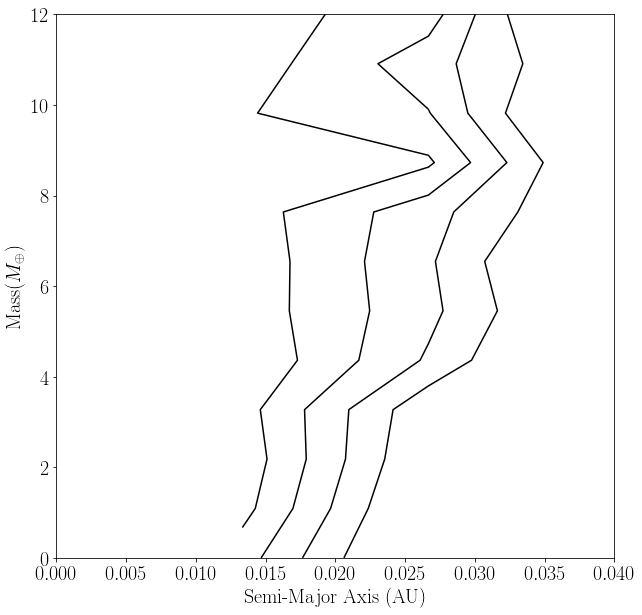

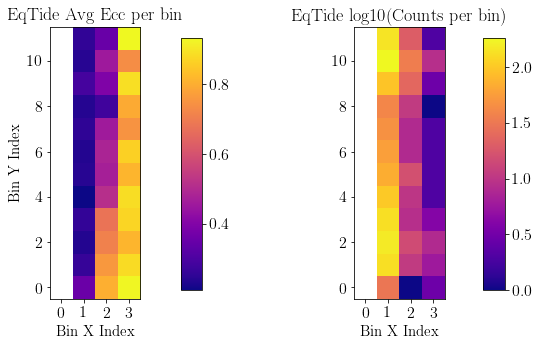

In [88]:
# now lets do eq_only analysis
merged_data_eqtide = final_data_eqonly[np.where(final_data_eqonly['bMerge_eqtide'] == 1)]
n_merged_eqtide = len(merged_data_eqtide)
n_comp_eqtide = len(final_data_eqonly[np.where(final_data_eqonly['bMerge_eqtide'] != -9999)])
print(n_merged_eqtide)
print(n_comp_eqtide)
# x = semi; y = mass; z = ecc
semib_eqonly = merged_data_eqtide['semi_b_0'] # x 
massb_eqonly = merged_data_eqtide['mass_b_0'] # y 
eccb_eqonly = merged_data_eqtide['ecc_b_0'] # z
levels=[0.1,0.2,0.3,0.4,0.5,0.6]
#pdb.set_trace()
x_axis, y_axis, z_axis, z_meta_axis = make_contour(semib_eqonly,massb_eqonly,eccb_eqonly,
                      y_binwidth=1.0,x_binwidth=0.01,xlim=(0,0.04), levels=levels,
                      names='contour_Eqtide',fontsize=20);

make_contour_meta_plots(z_axis, z_meta_axis, 'EqTide', cmap='plasma', log10_counts=True)

In [ ]:
# lets make histogram of eq_only merged cases and their semis


print(len(semib_eqonly))
# 80% have merged with semis less than 0.022 AU; lets filter all the others out
p025semi_mask = np.where(semib_eqonly <= 0.022)
masked_semi_eqonly = semib_eqonly[p025semi_mask]
n = masked_semi_eqonly.shape[0]
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,5)
bins = 10
ax.hist(masked_semi_eqonly,bins=bins, weights=np.zeros_like(masked_semi_eqonly)+1./masked_semi_eqonly.size)
#ax.text(0.019,0.125, 'N = %i'%(n))
ax.set_xlabel('Semi-Major Axis (AU)', fontsize=20)
ax.set_ylabel('Fraction of\nPlanets', fontsize=20)
#ax.set_title('Inner Planet Merged');
fig.savefig("./figs/eqtide_merge.pdf", bbox_inches='tight',dpi=plot_dpi)

In [ ]:
# here we want to look at a few cases that merged with CPL and see if they merge with CTL
merged_data_eqtide[np.where((merged_data_eqtide['ecc_b_0']>0.23) & (merged_data_eqtide['ecc_b_0']<0.4))]

In [ ]:
# lets make a table of cpl vs ctl
# we want to write a function that will calculate the mean motion given a period
# and then use that mean motion to convert to tau given tidal q
# first we need to determine a period from semi-major axis
def calc_period(semi, m, M):
    """
    m = planetary mass
    M = star mass
    semi = semi-major axis of planet in question
    """
    period = np.sqrt( (semi**3 * 4 * np.pi**2) / (const.G * (m + M)) )
    return period.to(u.yr)

def mean_motion(period):
    n = 1/period
    return n

def calc_tau(Q, mean_motion):
    tau = 1/(Q * mean_motion)
    return tau


semi = 0.0575777128498*u.AU
planet_mass = 11.2795806898*u.earthMass
star_mass = 1.06530080614*u.solMass
Q = 3378070.86836

period = calc_period(semi, planet_mass, star_mass)
mean_motion = mean_motion(period)
tau = calc_tau(Q, mean_motion)

print(period)
print(mean_motion)
print(tau.to(u.s))

2134
24927
Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


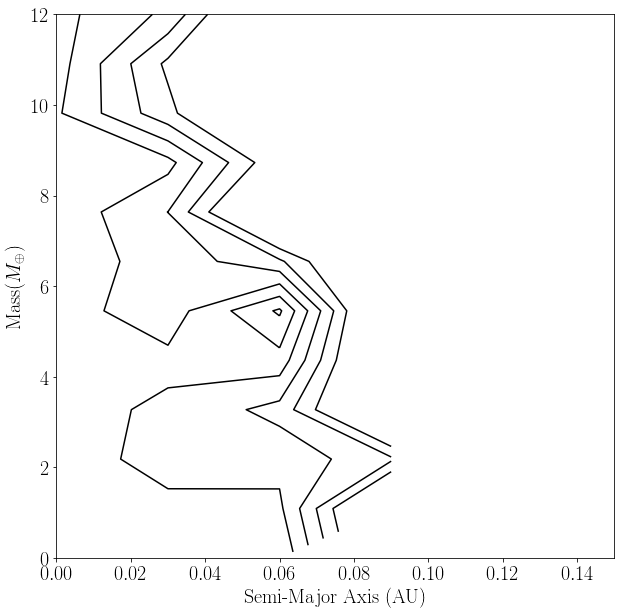

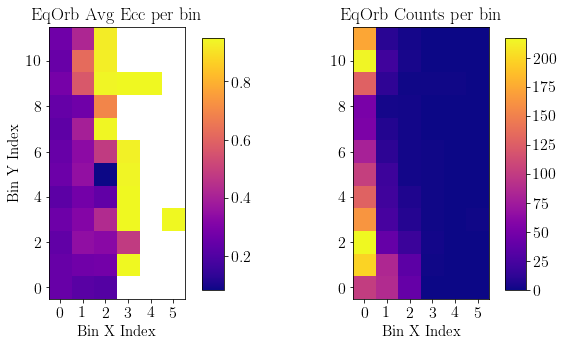

In [92]:
comp_data_eqorb = final_data_eqorb[np.where(final_data_eqorb['bMerge_eqorb'] != -9999)]

merged_data_eqorb = comp_data_eqorb[np.where(comp_data_eqorb['bMerge_eqorb'] == 1)]
n_merged_eqorb = len(merged_data_eqorb)
n_comp_eqorb = len(comp_data_eqorb)
print(n_merged_eqorb)
print(n_comp_eqorb)
massb_eqorb = merged_data_eqorb['mass_b_0']
semib_eqorb = merged_data_eqorb['semi_b_0']
eccb_eqorb = merged_data_eqorb['ecc_b_0']

x_axis, y_axis, z_axis, z_meta_axis = make_contour(semib_eqorb, massb_eqorb, eccb_eqorb, 
                             y_binwidth=1, ylim = (0,12),
                             x_binwidth=0.025, xlim=(0,0.15), names='contour_EqOrb',fontsize=20)

make_contour_meta_plots(z_axis, z_meta_axis, 'EqOrb', cmap='plasma', log10_counts=False)

In [ ]:
# now lets filter out the ones that didnt complete...
completed_eqorb_data = final_data_eqorb[np.where(final_data_eqorb['bMerge_eqorb'] != -9999)]

# find the ones that merged with the addition of a planet
distorb_caused_merge = completed_eqorb_data[np.where(completed_eqorb_data['bMerge_eqorb'] == 1)]
distorb_caused_merge = distorb_caused_merge[np.where(distorb_caused_merge['bMerge_eqtide'] == 0)]
distorb_caused_merge

In [ ]:
def make_eqorb_merge_eq_nomerge_hist(orb_merge_eq_nomerge_data, bins = 20):
    # we want to make a histogram of semi_b
    semi_b = orb_merge_eq_nomerge_data['semi_b_0']
    semi_c = orb_merge_eq_nomerge_data['semi_c_0']
    
    fontsize=20
    
    fig,ax = plt.subplots(2,1)
    fig.set_size_inches(10,10)
    ax[0].hist(semi_b, bins=bins, weights = np.zeros_like(semi_b)+1./semi_b.size, label='b')
    ax[0].set_xlabel("Primary Inner Planet Semi(AU)", fontsize=fontsize)
    ax[0].set_ylabel("Percentage", fontsize=fontsize)
    ax[0].set_title("Outer Planet Caused Merge", fontsize=fontsize)
    ax[0].tick_params(labelsize=fontsize)
    ax[0].legend(loc=0)
    
    ax[1].hist(semi_c, bins=bins, weights = np.zeros_like(semi_c)+1./semi_c.size, color='orange', label='c')
    ax[1].set_xlabel("Outer Semi(Au)", fontsize=fontsize)
    ax[1].set_ylabel("Percentage", fontsize=fontsize)
    ax[1].set(xlabel="Secoundary Outer Planet Semi(AU)", ylabel="Percentage")
    ax[1].legend(loc=0, fontsize=fontsize-2)
    ax[1].tick_params(labelsize=fontsize)
    fig.savefig("./figs/outer_planet_merge.pdf", bbox_inches='tight',dpi=plot_dpi)
    
make_eqorb_merge_eq_nomerge_hist(distorb_caused_merge)

In [ ]:
# the addition of an outer planet can extend the distance at which the inner planet can merge. 
# cool!!

In [ ]:
strength_data = final_data_eqorb['strength']
fontsize=20

fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
#x_bins = np.logspace(4,16,50)
x_bins = np.logspace(-6, 8, 50)
hist_data = ax.hist(strength_data, x_bins, weights=np.zeros_like(strength_data)+1./strength_data.size, alpha=0.4, label='all cases')

orange = ax.hist(distorb_caused_merge['strength'],x_bins,color='orange', alpha=0.4,
                    weights=np.zeros_like(distorb_caused_merge['strength'])+1./distorb_caused_merge['strength'].size,
                label='C caused Merge')
ax.set_xscale('log')
ax.set_xlim(1e-3,1e4)
ax.set_xlabel('Strength of Interaction', fontsize=fontsize)
ax.set_ylabel('Fraction of\nPlanets', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)

fig.savefig('./figs/strength_hist.pdf', bbox_inches='tight', dpi=300)
#orb_merge_eq_nomerge_data[:,-3].astype(np.float64)




In [ ]:
# cite murray and dermott that disturbing function scales with with e proportional to this function.
# can normalize strength?

1736
14944
Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


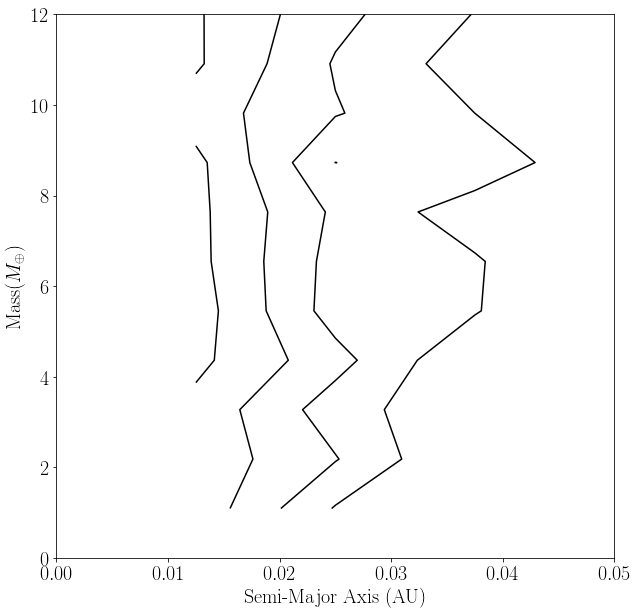

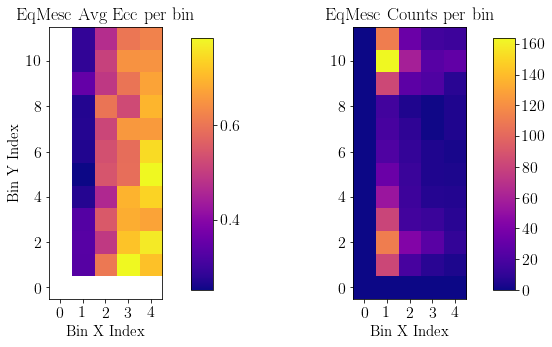

In [70]:
# now lets analyze the eqtide+atmesc cases
merged_data_eqmesc = final_data_eqmesc[np.where(final_data_eqmesc['bMerge_eqmesc'] == 1)]
n_merged_eqmesc = len(merged_data_eqmesc)
n_comp_eqmesc = len(final_data_eqmesc[np.where(final_data_eqmesc['bMerge_eqmesc'] != -9999)])
print(n_merged_eqmesc)
print(n_comp_eqmesc)
x_data = merged_data_eqmesc['semi_b_0']
y_data = merged_data_eqmesc['mass_b_0']
z_data = merged_data_eqmesc['ecc_b_0']

levels=[0.1,0.2,0.3,0.4,0.5,0.6]

x_axis, y_axis, z_axis, z_meta_axis = make_contour(x_data, y_data, z_data, y_binwidth=1, ylim = (0,12), levels=levels,
                                      x_binwidth=0.01, xlim=(0,0.05), names='contour_EqMesc',fontsize=20);

make_contour_meta_plots(z_axis, z_meta_axis, 'EqMesc', cmap='plasma')

In [ ]:
# now lets filter out the ones that didnt complete...
completed_eqmesc_data = final_data_eqmesc[np.where(final_data_eqmesc['bMerge_eqmesc'] != -9999)]

# find the ones that merged with the addition of a planet
atmesc_caused_merge = completed_eqmesc_data[np.where(completed_eqmesc_data['bMerge_eqmesc'] == 0)]
atmesc_caused_merge = atmesc_caused_merge[np.where(atmesc_caused_merge['bMerge_eqtide'] == 1)]
atmesc_caused_merge

2698
20256
729
Shaping Contour Data...
Making Eccentricty Plot


/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dm1681/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


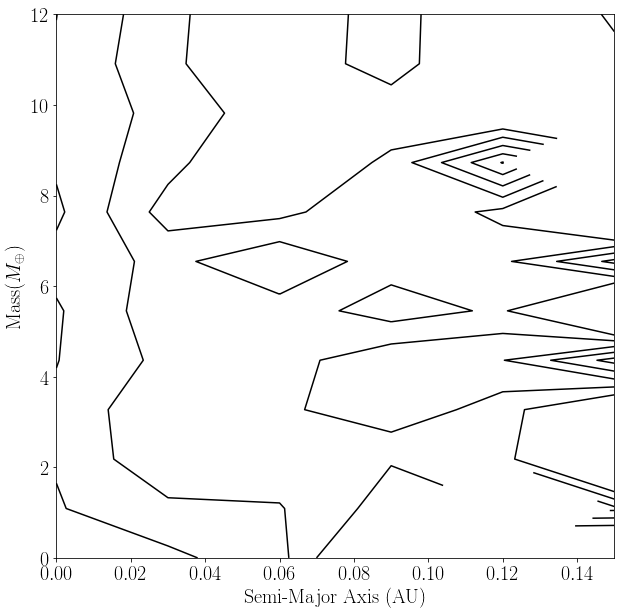

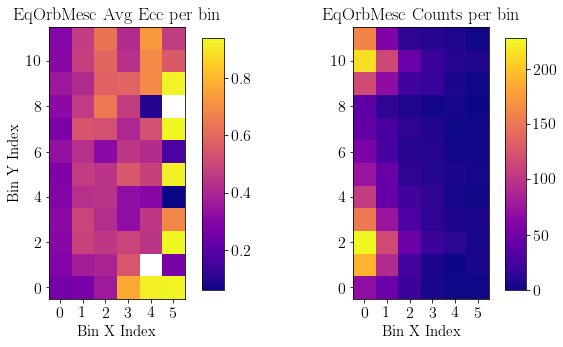

In [72]:
merged_data_eqorbmesc = final_data_eqorbmesc[np.where(final_data_eqorbmesc['bMerge_eqorbmesc'] == 1)]
n_merged_eqorbmesc = len(merged_data_eqorbmesc)
n_comp_eqorbmesc = len(final_data_eqorbmesc[np.where(final_data_eqorbmesc['bMerge_eqorbmesc'] != -9999)])
n_incomp_eqorbmesc = len(final_data_eqorbmesc[np.where(final_data_eqorbmesc['bMerge_eqorbmesc'] == -9999)])
print(n_merged_eqorbmesc)
print(n_comp_eqorbmesc)
print(n_incomp_eqorbmesc)
x_data = merged_data_eqorbmesc['semi_b_0']
y_data = merged_data_eqorbmesc['mass_b_0']
z_data = merged_data_eqorbmesc['ecc_b_0']

levels = [0.1,0.2,0.3,0.4,0.5]
x_axis, y_axis, z_axis, z_meta_axis = make_contour(x_data, y_data, z_data, y_binwidth=1, ylim = (0,12),
             x_binwidth=0.025, xlim=(0,0.15), names='contour_EqOrbMesc',
             levels=levels,fontsize=20);

make_contour_meta_plots(z_axis, z_meta_axis, 'EqOrbMesc', cmap='plasma')

In [94]:
merged_data_eqorbmesc = final_data_eqorbmesc[np.where(final_data_eqorbmesc['bMerge_eqorbmesc'] == 1)]
interesting_cases = merged_data_eqorbmesc[np.where((merged_data_eqorbmesc['bMerge_eqorb'] == 0) 
                                                  & (merged_data_eqorbmesc['bMerge_eqmesc'] == 0) 
                                                  & (merged_data_eqorbmesc['bMerge_eqtide'] == 0) )]

interesting_cases

Dirs,mass_b_0,mass_c_0,semi_b_0,semi_c_0,ecc_b_0,ecc_c_0,strength,bMerge_eqtide,bMerge_eqmesc,bMerge_eqorb,bMerge_eqorbmesc
str33,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
./final_data/runs_eqorbmesc/16418,7.31315077365,9.63009957994,0.0267280806549,0.0767280806549,0.0235762641891,0.368349459236,59.435747517770864,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/18661,3.84936746814,10.1114312515,0.0199488439757,0.0499488439757,0.422076457663,0.22370248853,44.43066149051011,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/11241,11.4352260628,6.85290611473,0.0436477645089,0.163647764509,0.436009866193,0.406049955405,39.6485419935416,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/14652,4.58294125677,5.10030443049,0.0315225919114,0.0915225919114,0.0972488339227,0.428793985472,31.37269507750613,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/14909,9.62401139624,3.01155459103,0.0921082739801,0.47210827398,0.352941911875,0.616625246613,14.736604349248188,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/22872,5.53560373789,7.3401276519,0.0209715346328,0.0609715346328,0.211554612383,0.410580967086,77.21050711978982,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/21495,11.4673106001,8.52366398333,0.0241152712998,0.0841152712998,0.0347843406977,0.492351309791,114.16296517245291,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/19179,3.22717791373,12.1409905577,0.0782674400333,0.568267440033,0.31293575438,0.657132868216,190.06391040412342,0.0,0.0,0.0,1.0
./final_data/runs_eqorbmesc/22031,10.5044176553,7.79819328561,0.0809140547069,0.300914054707,0.16237208439,0.530450150194,22.767967402744087,0.0,0.0,0.0,1.0


In [ ]:
# lets try 22031
# 11241
# 14652
# try another

In [ ]:
# make histogram below
# planets that lost envelopes
# send rory the hill stab case

In [ ]:
# case that lost a lot of atmosphere, compare eqtide+atmesc w/ eqtide orbital params. 
# run atmesc cases. 

#mardling and lin 2004; raymond 2006 (some destruction), 

/home/dm1681/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Computer Modern'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


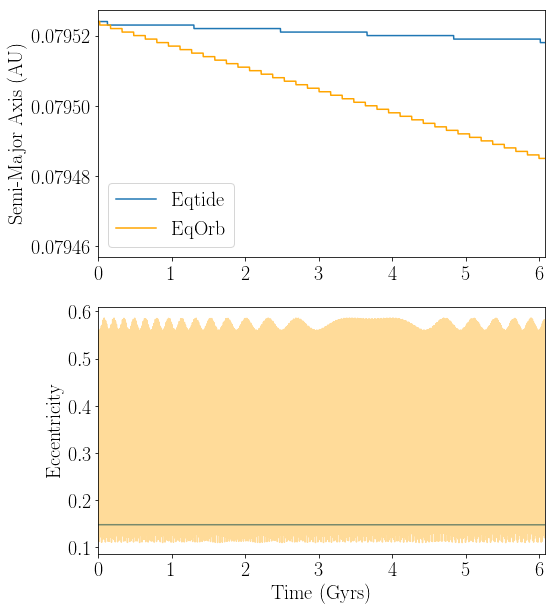

In [95]:
eqtide_fwd_data = np.loadtxt('./final_data/char/eqtide/system.b.forward', dtype=np.float64)
time_eqtide = eqtide_fwd_data[:,0]
semi_eqtide = eqtide_fwd_data[:,1]
ecc_eqtide = eqtide_fwd_data[:,2]

eqorb_fwd_data = np.loadtxt('./final_data/char/eqorb/system.b.forward', dtype=np.float64)
time_eqorb = eqorb_fwd_data[:,0]
semi_eqorb = eqorb_fwd_data[:,1]
ecc_eqorb = eqorb_fwd_data[:,2]
#pdb.set_trace()

eqmesc_fwd_data = np.loadtxt('./final_data/char/eqmesc/system.b.forward', dtype=np.float64)
time_eqmesc = eqmesc_fwd_data[:,0]
semi_eqmesc = eqmesc_fwd_data[:,1]
ecc_eqmesc = eqmesc_fwd_data[:,2]
envmass_eqmesc = eqmesc_fwd_data[:,-3]

eqorbmesc_fwd_data = np.loadtxt('./final_data/char/eqorbmesc/system.b.forward', dtype=np.float64)
time_eqorbmesc = eqorbmesc_fwd_data[:,0]
semi_eqorbmesc = eqorbmesc_fwd_data[:,1]
ecc_eqorbmesc = eqorbmesc_fwd_data[:,2]
envmass_eqorbmesc = eqorbmesc_fwd_data[:,-3]

fontsize=20

fig,ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].plot(time_eqtide/1e9, semi_eqtide, label='Eqtide')
ax[0].plot(time_eqorb/1e9, semi_eqorb, color='orange', label='EqOrb')
ax[0].set_ylabel('Semi-Major Axis (AU)', fontsize=fontsize)

ax[0].set_xlim(0,max(time_eqmesc/1e9))
ax[0].legend(loc=0, fontsize=fontsize)
ax[0].tick_params(labelsize=fontsize)

ax[1].plot(time_eqtide/1e9, ecc_eqtide)
ax[1].plot(time_eqorb/1e9, ecc_eqorb, color='orange', alpha = 0.4)
ax[1].set_xlim(0,max(time_eqmesc/1e9))
ax[1].set_ylabel('Eccentricity', fontsize=fontsize)
ax[1].set_xlabel('Time (Gyrs)', fontsize=fontsize);
ax[1].tick_params(labelsize=fontsize)
fig.savefig('./figs/char_cases_eqtide_eqorb.pdf', bbox_inches='tight', dpi=plot_dpi)




In [ ]:
# lets find a characteristic case for eqtide only, showing the evolution of semi and ecc.

fontsize=20

fig,ax = plt.subplots(2,1)
fig.set_size_inches(8,10)
ax[0].plot(time_eqtide/1e9, semi_eqtide, label='Eqtide')
ax[0].plot(time_eqorb/1e9, semi_eqorb, color='orange', label='EqOrb')
ax[0].plot(time_eqmesc/1e9, semi_eqmesc, color='green', label='EqMesc')
ax[0].plot(time_eqorbmesc/1e9, semi_eqorbmesc, color='purple',label='EqOrbMesc')
ax[0].set_ylabel('Semi-Major Axis (AU)', fontsize=fontsize)
ax[0].set_xlim(0,max(time_eqmesc/1e9))
ax[0].legend(loc=0, fontsize=fontsize-2)
ax[0].tick_params(labelsize=fontsize)

ax[1].plot(time_eqtide/1e9, ecc_eqtide)
ax[1].plot(time_eqorb/1e9, ecc_eqorb, color='orange', alpha = 0.4)
ax[1].plot(time_eqmesc/1e9, ecc_eqmesc, color='green')
ax[1].plot(time_eqorbmesc/1e9, ecc_eqorbmesc, color='purple', alpha = 0.4)
ax[1].set_xlim(0,max(time_eqmesc/1e9))
ax[1].set_ylabel('Eccentricity', fontsize=fontsize)
ax[1].set_xlabel('Time (Gyrs)', fontsize=fontsize);
ax[1].tick_params(labelsize=fontsize)

fig.savefig('./figs/char_cases.pdf', bbox_inches='tight', dpi=plot_dpi)

In [ ]:
fig,ax = plt.subplots(1,1)

ax.plot(time_eqmesc, envmass_eqmesc, color='green', label='EqMesc')
ax.plot(time_eqorbmesc, envmass_eqorbmesc, color='purple', label='EqOrbMesc')
ax.legend(loc=0)
ax.set_ylabel('Envelope Mass ($M_\oplus$)',fontsize=16)
ax.set_xlabel('Time (yrs)',fontsize=16)






In [ ]:
char_runs = './final_data/char/eqorbmesc'
#longp - longa = argp

# at 1.533e+09
# b_inputs
mass_b = 11.187142
semi_b = 0.024181
ecc_b = 0.0000
longp_b = 150.48573
incl_b = 11.792885
longa_b = 236.625886
argp_b = longp_b - longa_b
print("b: ",argp_b+360)

# c_inputs
mass_c = 6.86527461963
rad_c = 1.68792324516
semi_c = 0.289524
ecc_c = 8.694680e-13
longp_c = 154.969469
incl_c = 2.989354
longa_c = 36.933234
argp_c = longp_c - longa_c
print('c: ',argp_c)









In [ ]:
#b_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_0/system.b.forward')
#c_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_0/system.c.forward')

#b_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_1/system.b.forward')
#c_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/binvplane_1/system.c.forward')

b_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/1470000000.0/system.b.forward',usecols=(0,2))
c_fwd = np.loadtxt('./final_data/char/eqorbmesc/snapshot/1470000000.0/system.c.forward',usecols=(0,2))

In [ ]:
fontsize=20

b_ecc = b_fwd[:,1]
b_time = b_fwd[:,0]
c_ecc = c_fwd[:,1]
c_time = c_fwd[:,0]

fig,ax = plt.subplots(1,2)
fig.set_size_inches(16,5)

ax[0].semilogy(b_time/1e6, b_ecc, label='b')

ax[0].set_xlabel('Time (Myrs)', fontsize=fontsize)
ax[0].set_ylabel('Eccentricity', fontsize=fontsize)
ax[0].legend(loc=0,fontsize=fontsize-2)
ax[0].tick_params(labelsize=fontsize)

#ax[1].plot(c_time/1e6, c_ecc, label='c', color='orange')
ax[1].semilogy(c_time/1e6, c_ecc, label='c', color='orange')
ax[1].set_xlabel('Time (Myrs)', fontsize=fontsize)
ax[1].legend(loc=0, fontsize=fontsize-2)
ax[1].tick_params(labelsize=fontsize)

fig.savefig('./figs/ecc_evol_147gyrs_together.pdf', bbox_inches='tight', dpi=plot_dpi)

In [ ]:
# lets look at the snapshot


b_ecc = b_fwd[:,1]
b_time = b_fwd[:,0]
c_ecc = c_fwd[:,1]
c_time = c_fwd[:,0]

fig,ax = plt.subplots(1,1)
fig.set_size_inches(16,10)
ax[0,0].plot(b_time/1e6, b_ecc, label='b')
ax[0,1].plot(c_time/1e6, c_ecc, color='orange', label='c')
ax[1,0].set_xlabel('Time (Gyrs)',fontsize=18)
ax[0,0].set_ylabel('Ecc', fontsize=18)
ax[1,0].set_ylabel('Ecc', fontsize=18)

ax[1,1].set_xlabel('Time (Yrs)',fontsize=18)

ax[0,1].legend(loc=0, fontsize=14)
ax[0,0].legend(loc=0, fontsize=14)

ax[1,0].plot(b_time/1e6, b_ecc, label='b')
ax[1,0].set_xlim(21, 23)
ax[1,0].set_ylim(0,0.001)
ax[1,1].plot(c_time/1e6, c_ecc, color='orange', label='c')
ax[1,1].set_xlim(21, 23)
ax[1,1].set_ylim(0,0.002)
fig.savefig('figs/Ecc_evol_147gyrs.pdf', bbox_inches='tight', dpi=plot_dpi)

In [ ]:
# this script will create initial conditions for distorb and eqtide based on the outputs from any given time in the 
# forward files. 

def create_ICs(time, duration, outputtime, dest_dir='./final_data/char/eqorbmesc/snapshot/'):
    b_fwd = np.loadtxt('./final_data/char/eqorbmesc/system.b.forward')
    c_fwd = np.loadtxt('./final_data/char/eqorbmesc/system.c.forward')
    
    # lets get the data accoring to the time specified in the argument
    for line_b, line_c in zip(b_fwd, c_fwd):
        if ((line_b[0] == time) and (line_c[0] == time)):
            semi_b = np.float64(line_b[1])
            ecc_b = np.float64(line_b[2])
            longp_b = np.float64(line_b[5])
            incl_b = np.float64(line_b[6])
            longa_b = np.float64(line_b[7])
            mass_b = np.float64(line_b[8])
            argp_b = longp_b - longa_b
            if argp_b > 360:
                argp_b = argp_b - 360
            elif argp_b < 0:
                argp_b = argp_b + 360
            
            semi_c = np.float64(line_c[1])
            ecc_c = np.float64(line_c[2])
            longp_c = np.float64(line_c[3])
            incl_c = np.float64(line_c[4])
            longa_c = np.float64(line_c[5])
            mass_c = 6.86527461963
            argp_c = longp_c - longa_c
            if argp_c > 360:
                argp_c = argp_c - 360
            elif argp_c < 0:
                argp_c = argp_c + 360
    # now that we have the data, lets write to file.
    # they already exist at:
    # so lets copy it over to dest_dir
    snapshot_dir = './final_data/char/eqorbmesc/snapshot/'
    dest_dir = dest_dir + str(time) + '/'
    if os.path.isdir(dest_dir) == False:
        os.mkdir(dest_dir)
    shutil.copyfile(snapshot_dir+'b.in',dest_dir+'b.in')
    shutil.copyfile(snapshot_dir+'c.in',dest_dir+'c.in')
    shutil.copyfile(snapshot_dir+'star.in',dest_dir+'star.in')
    shutil.copyfile(snapshot_dir+'vpl.in',dest_dir+'vpl.in')
    
    b_file = open(snapshot_dir+'b.in','r')
    b_content = b_file.readlines()
    b_file.close()

    oldmass_b = b_content[4].split('\t\t')[1][:-1]
    b_content[4] = b_content[4].replace(oldmass_b,str(mass_b*-1))
    
    oldecc_b = b_content[9].split('\t\t')[1][:-1]
    b_content[9] = b_content[9].replace(oldecc_b, str(ecc_b))
    
    oldsemi_b = b_content[10].split('\t\t')[1][:-1]
    b_content[10] = b_content[10].replace(oldsemi_b, str(semi_b))
    
    oldincl_b = b_content[12].split('\t\t')[1][:-1]
    b_content[12] = b_content[12].replace(oldincl_b, str(incl_b))
    
    oldlonga_b = b_content[13].split('\t\t')[1][:-1]
    b_content[13] = b_content[13].replace(oldlonga_b, str(longa_b))
    
    oldargp_b = b_content[14].split('\t\t')[1][:-1]
    b_content[14] = b_content[14].replace(oldargp_b, str(argp_b))
    
    b_new_content = ''.join(b_content)
    
    b_new = open(dest_dir+'b.in','w')
    b_new.write(b_new_content)
    b_new.close()
    
    c_file = open(snapshot_dir+'c.in','r')
    c_content = c_file.readlines()
    c_file.close()


    oldmass_c = c_content[4].split('\t\t')[1][:-1]
    c_content[4] = c_content[4].replace(oldmass_c,str(mass_c*-1))
    
    oldecc_c = c_content[9].split('\t\t')[1][:-1]
    c_content[9] = c_content[9].replace(oldecc_c, str(ecc_c))
    
    oldsemi_c = c_content[10].split('\t\t')[1][:-1]
    c_content[10] = c_content[10].replace(oldsemi_c, str(semi_c))
    
    oldincl_c = c_content[12].split('\t\t')[1][:-1]
    c_content[12] = c_content[12].replace(oldincl_c, str(incl_c))
    
    oldlonga_c = c_content[13].split('\t\t')[1][:-1]
    c_content[13] = c_content[13].replace(oldlonga_c, str(longa_c))
    
    oldargp_c = c_content[14].split('\t\t')[1][:-1]
    c_content[14] = c_content[14].replace(oldargp_c, str(argp_c))

    c_new_content = ''.join(c_content)
    
    c_new = open(dest_dir+'c.in','w')
    c_new.write(c_new_content)
    c_new.close()
    
    vpl_file = open(snapshot_dir+'vpl.in','r')
    vpl_content = vpl_file.readlines()
    vpl_file.close()
    
    oldoutput_time = vpl_content[-1].split('\t')[1][:-1]
    vpl_content[-1] = vpl_content[-1].replace(oldoutput_time,str(outputtime))
    
    oldstop_time = vpl_content[-2].split('\t')[1][:-1]
    vpl_content[-2] = vpl_content[-2].replace(oldstop_time,str(duration))
    #pdb.set_trace()
    
    new_vpl_content = ''.join(vpl_content)
    vpl_new = open(dest_dir+'vpl.in','w')
    vpl_new.write(new_vpl_content)
    vpl_new.close()
    
    

    
        
            
            
create_ICs(1.470e09,25e6,1)    

In [ ]:
# larger outer mass planet more likely causing stronger strength, stronger ecc oscillations, faster damping in a_b


In [ ]:
n_merged_eqtide_ctl = 320
n_comp_eqtide_ctl = 25000
weighted_merges_eqtide = n_merged_eqtide / n_comp_eqtide
weighted_merges_eqtide_ctl = n_merged_eqtide_ctl / n_comp_eqtide_ctl
weighted_merges_eqorb = n_merged_eqorb / n_comp_eqorb
weighted_merges_eqmesc = n_merged_eqmesc / n_comp_eqmesc
weighted_merges_eqorbmesc = n_merged_eqorbmesc / n_comp_eqorbmesc

print("Eqtide(cpl):\t\t\t", weighted_merges_eqtide)
print("EqOrb:\t\t\t", weighted_merges_eqorb)
print("EqMesc:\t\t\t", weighted_merges_eqmesc)
print("EqOrbMesc:\t\t", weighted_merges_eqorbmesc, '\n')

print("Eqtide(CTL)/Eqtide(CPL):", weighted_merges_eqtide_ctl/weighted_merges_eqtide)
print("EqOrb/Eqtide:\t\t", weighted_merges_eqorb/weighted_merges_eqtide)
print("EqMesc/Eqtide:\t\t",weighted_merges_eqmesc/weighted_merges_eqtide)
print("EqOrbMesc/Eqtide:\t",weighted_merges_eqorbmesc/weighted_merges_eqtide)

In [ ]:
8.561 - 5.976

In [ ]:
13.32 - 5.976

In [ ]:
(20/25000)*100/5.976
